In [20]:
import numpy as np
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('../data/processed/player_data_clean.csv')

In [3]:
df.head()

,Unnamed: 0,seas_id,season,player_id,player,age,experience,tm,g,gs,...,bpm,vorp,person_id,height,weight,pos_PG,pos_SG,pos_PF,pos_SF,pos_C
0,0,31137,2024,5026,A.J. Lawson,23,2,DAL,42,0.0,...,-4.6,-0.2,1630639,78,179.0,False,True,False,False,False
1,1,30459,2023,5026,A.J. Lawson,22,1,TOT,15,0.0,...,-4.4,-0.1,1630639,78,179.0,False,True,False,False,False
2,3,30461,2023,5026,A.J. Lawson,22,1,DAL,14,0.0,...,-4.6,-0.1,1630639,78,179.0,False,True,False,False,False
3,4,31138,2024,5027,AJ Griffin,20,2,ATL,20,0.0,...,-9.6,-0.3,1631100,78,220.0,False,False,False,True,False
4,5,30467,2023,5027,AJ Griffin,19,1,ATL,72,12.0,...,-0.8,0.4,1631100,78,220.0,False,False,False,True,False


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11607 entries, 0 to 11606
Data columns (total 78 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     11607 non-null  int64  
 1   seas_id                        11607 non-null  int64  
 2   season                         11607 non-null  int64  
 3   player_id                      11607 non-null  int64  
 4   player                         11607 non-null  object 
 5   age                            11607 non-null  int64  
 6   experience                     11607 non-null  int64  
 7   tm                             11607 non-null  object 
 8   g                              11607 non-null  int64  
 9   gs                             11607 non-null  float64
 10  mp                             11607 non-null  int64  
 11  fg_per_100_poss                11607 non-null  float64
 12  fga_per_100_poss               11607 non-null 

In [5]:
scaled_df = df.drop(columns=['g', 'gs', 'mp', 'tm', 'Unnamed: 0', 'seas_id', 'season', 'player_id', 'player', 'age'])
scaler = StandardScaler()
scaled_df = scaler.fit_transform(scaled_df)

In [6]:
scaled_df

array([[-0.96655715,  0.46117653,  0.4926652 , ..., -0.51109605,
        -0.48901677, -0.48210711],
       [-1.21323325,  1.26074307,  0.81982525, ..., -0.51109605,
        -0.48901677, -0.48210711],
       [-1.21323325,  1.12748198,  0.81982525, ..., -0.51109605,
        -0.48901677, -0.48210711],
       ...,
       [-0.22652886,  0.01697289,  0.51447587, ..., -0.51109605,
        -0.48901677, -0.48210711],
       [ 1.50020381,  1.43842453,  1.77949471, ...,  1.95657941,
        -0.48901677, -0.48210711],
       [ 0.76017552, -0.91585475, -1.07770302, ..., -0.51109605,
        -0.48901677, -0.48210711]])

In [7]:
pca = PCA()
pc_df = pca.fit_transform(scaled_df)
exp_var = np.cumsum(pca.explained_variance_ratio_)

<Axes: >

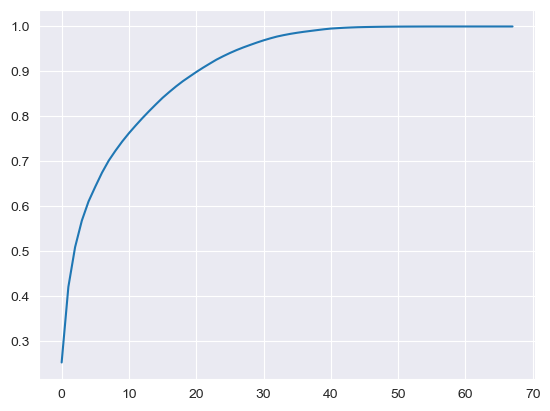

In [8]:
sns.lineplot(x=list(range(0,68)), y=exp_var)

In [9]:
exp_var[20], exp_var[30], exp_var[40]

(0.8987605436423041, 0.9691445338278355, 0.9953518814808993)

In [22]:
df_subset = df[['g', 'gs', 'mp', 'tm', 'season', 'player_id', 'player', 'pos_PG', 'pos_SG', 'pos_PF', 'pos_SF', 'pos_C']]
pc_df = pd.merge(df_subset.reset_index(), pd.DataFrame(pc_df).reset_index())

In [23]:
pc_df

,index,g,gs,mp,tm,season,player_id,player,pos_PG,pos_SG,...,58,59,60,61,62,63,64,65,66,67
0,0,42,0.0,311,DAL,2024,5026,A.J. Lawson,False,True,...,-0.008854,0.002738,0.001879,0.004023,-0.020270,0.000668,0.000485,0.003763,5.370073e-07,-1.908892e-16
1,1,15,0.0,108,TOT,2023,5026,A.J. Lawson,False,True,...,-0.010737,0.007895,-0.000333,-0.009300,-0.009687,-0.000439,-0.001438,0.000205,3.115118e-05,7.249713e-17
2,2,14,0.0,106,DAL,2023,5026,A.J. Lawson,False,True,...,-0.013038,-0.021599,0.001891,-0.010416,-0.009943,0.013698,0.000027,0.002890,3.354277e-05,-8.121174e-18
3,3,20,0.0,171,ATL,2024,5027,AJ Griffin,False,False,...,0.016450,0.002371,0.023309,0.006623,-0.021649,-0.000122,-0.003157,-0.002785,-1.111204e-04,-3.874242e-16
4,4,72,12.0,1401,ATL,2023,5027,AJ Griffin,False,False,...,-0.002371,0.003758,-0.000147,-0.007180,-0.008323,-0.000330,-0.000641,0.000139,-2.102070e-05,-3.315974e-20
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11602,11602,11,0.0,103,TOT,1997,2546,Stacey King,False,False,...,0.011294,0.004668,-0.002461,-0.007801,-0.008035,-0.000128,0.000843,0.003453,-5.026002e-05,2.098957e-17
11603,11603,35,3.0,268,BOS,1997,3027,Steve Hamer,False,False,...,0.018085,-0.000983,-0.001872,0.001614,0.000542,-0.000478,0.001289,0.003638,-3.140313e-05,2.247707e-17
11604,11604,27,1.0,237,HOU,1997,2692,Tracy Moore,False,True,...,0.005798,-0.003784,-0.024143,0.002705,-0.000324,0.000638,-0.000619,0.000624,2.278618e-06,1.733563e-17
11605,11605,53,15.0,778,PHO,1997,2277,Wayman Tisdale,False,False,...,-0.004385,-0.005487,-0.000202,0.009288,0.008839,0.000147,-0.001092,-0.004059,-9.664443e-07,-1.077925e-17


In [28]:
pc_df[(pc_df['tm']=='BOS') & (pc_df['season']==2024)].sort_values('mp', ascending=False)

,index,g,gs,mp,tm,season,player_id,player,pos_PG,pos_SG,...,58,59,60,61,62,63,64,65,66,67
1247,1247,74,74.0,2645,BOS,2024,4518,Jayson Tatum,False,False,...,-0.024449,-0.000189,0.004075,0.018031,-0.006994,-0.011778,0.000248,-0.000229,2.283857e-06,-1.344738e-17
704,704,73,73.0,2381,BOS,2024,4492,Derrick White,False,True,...,0.001786,-0.023780,0.002766,0.001151,-0.023111,0.000099,-0.000092,0.000125,4.890645e-06,-6.508919e-18
1234,1234,70,70.0,2343,BOS,2024,4415,Jaylen Brown,False,False,...,-0.006535,-0.019814,0.025149,-0.014952,-0.011517,0.013775,0.000834,0.002758,1.713480e-05,-3.008510e-17
1432,1432,69,69.0,2263,BOS,2024,3891,Jrue Holiday,True,False,...,0.011238,0.005113,-0.000733,-0.008567,-0.007678,0.000029,-0.000425,0.000254,2.099597e-06,7.886300e-18
2117,2117,82,5.0,1825,BOS,2024,4875,Payton Pritchard,True,False,...,0.012332,-0.024357,0.021689,-0.010746,-0.010223,0.014547,-0.000787,-0.000019,-4.340250e-05,-7.656544e-18
2274,2274,79,13.0,1741,BOS,2024,5003,Sam Hauser,False,False,...,-0.022733,-0.001657,0.002316,0.020473,-0.004630,0.000063,0.000227,0.000316,5.972176e-06,-3.300251e-17
36,36,65,33.0,1740,BOS,2024,3734,Al Horford,False,False,...,0.000953,0.003252,0.023695,-0.000744,0.000525,-0.000085,0.000172,-0.000235,3.686106e-07,3.057351e-18
2038,2038,55,1.0,630,BOS,2024,4777,Oshae Brissett,False,False,...,0.016975,-0.027219,-0.000814,0.004992,-0.024686,0.000136,0.001339,0.002797,-3.616682e-05,-1.703597e-17
2361,2361,41,2.0,413,BOS,2024,4672,Svi Mykhailiuk,False,False,...,-0.013459,0.005311,0.001300,-0.008412,-0.008954,0.000172,0.000988,0.003601,-7.947477e-06,-9.018173e-18
1971,1971,28,0.0,333,BOS,2024,4995,Neemias Queta,False,False,...,0.024927,-0.000501,-0.002181,-0.000189,-0.003413,-0.000209,-0.000703,-0.000400,2.334215e-06,1.500991e-17


In [41]:
grouped_df = pc_df[pc_df['mp']>=250].groupby(by=['tm', 'season']).sum()
len(grouped_df[grouped_df['pos_C']==0]), len(grouped_df[grouped_df['pos_PG']==0])

(29, 10)

,,index,g,gs,mp,player_id,player,pos_PG,pos_SG,pos_PF,pos_SF,...,58,59,60,61,62,63,64,65,66,67
tm,season,,,,,,,,,,,,,,,,,,,,,


In [25]:
pc_df[['pos_PG', 'pos_SG', 'pos_PF', 'pos_SF', 'pos_C']].value_counts()

pos_PG  pos_SG  pos_PF  pos_SF  pos_C
True    False   False   False   False    2429
False   True    False   False   False    2373
        False   True    False   False    2321
                False   True    False    2158
                        False   True     2142
True    True    False   False   False      53
False   False   True    False   True       46
        True    False   True    False      46
        False   True    True    False      34
        True    True    False   False       3
        False   False   True    True        1
True    False   False   True    False       1
Name: count, dtype: int64

In [18]:
team_df = pd.read_csv('../data/interim/NBA_team_stats_1979-2024_clean.csv')

In [19]:
team_df.head()

,Unnamed: 0,Season,Team,W,G,L,W%,FG%,2P%,3P%,...,FTA/G,ORB/G,DRB/G,TRB/G,AST/G,STL/G,BLK/G,TOV/G,PF/G,PTS/G
0,0,2015,GSW,73,82,9,0.890,0.487,0.528,0.416,...,21.829268,9.951220,36.243902,46.195122,28.939024,8.402439,6.073171,15.182927,20.743902,114.890244
1,1,1995,CHI,72,82,10,0.878,0.478,0.496,0.403,...,24.439024,15.207317,29.402439,44.609756,24.792683,9.085366,4.207317,14.329268,22.036585,105.182927
2,2,1996,CHI,69,82,13,0.841,0.473,0.499,0.373,...,22.536585,15.060976,30.012195,45.073171,26.121951,8.731707,4.048780,13.524390,19.719512,103.146341
3,3,2016,GSW,67,82,15,0.817,0.495,0.557,0.383,...,22.560976,9.390244,35.036585,44.426829,30.378049,9.573171,6.768293,14.768293,19.329268,115.890244
4,4,2015,SAS,67,82,15,0.817,0.484,0.515,0.375,...,20.390244,9.390244,34.524390,43.914634,24.512195,8.256098,5.914634,13.060976,17.475610,103.536585


In [21]:
team_df[['Season', 'Team', 'W%']]

,Season,Team,W%
0,2015,GSW,0.890
1,1995,CHI,0.878
2,1996,CHI,0.841
3,2016,GSW,0.817
4,2015,SAS,0.817
...,...,...,...
1195,1997,VAN,0.232
1196,1992,MIN,0.232
1197,1989,CHH,0.232
1198,1987,NJN,0.232
